##### Load packages

In [1]:
# import packages
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble

import warnings 
warnings.filterwarnings("ignore")

##### load and merge data

URL: https://www.kaggle.com/c/zillow-prize-1/data<br>properties_2017.csv<br>properties_2017.csv<br>train_2016_v2.csv<br>train_2017.csv

In [2]:
# load properties
properties_2016 = pd.read_csv('./properties_2016.csv')
properties_2017 = pd.read_csv('./properties_2017.csv')
properties = pd.concat([properties_2016,properties_2017],ignore_index=True).drop_duplicates()

# load train
train_2016 = pd.read_csv('./train_2016_v2.csv', parse_dates=['transactiondate'])
train_2017 = pd.read_csv('./train_2017.csv', parse_dates=['transactiondate'])
train = pd.concat([train_2016,train_2017],ignore_index=True).drop_duplicates()
    
# merge properties and train
data = pd.merge(properties, train, on='parcelid', how='inner')

##### Peek of data

In [3]:
print(data.shape)
data.head()

(335776, 60)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,494390.0,859741.0,2015.0,365351.0,9608.74,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
1,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
2,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,128881.0,429608.0,2015.0,300727.0,5494.04,NaN,NaN,6.111001e+13,0.073985,2017-07-26
3,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017-07-26
4,17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,...,190508.0,282303.0,2015.0,91795.0,2954.74,NaN,NaN,6.111001e+13,0.071886,2017-07-28


##### Describe columns

Column 0: "parcelid"<br>Column 58: target "logerror"<br>Column 59: "transactiondate"<br>The meanings of column 1-57 are described as below:

In [4]:
# describ features
# URL: https://www.kaggle.com/c/zillow-prize-1/data
attributes = pd.read_excel('./zillow_data_dictionary.xlsx')
attributes.style

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (if any)
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
2,'basementsqft',Finished living area below or partially below ground level
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the building from best (lowest) to worst (highest)
6,'buildingclasstypeid',"The building framing type (steel frame, wood frame, concrete/brick)"
7,'calculatedbathnbr',Number of bathrooms in home including fractional bathroom
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + sink + toilet)


##### Transactions in varible counties

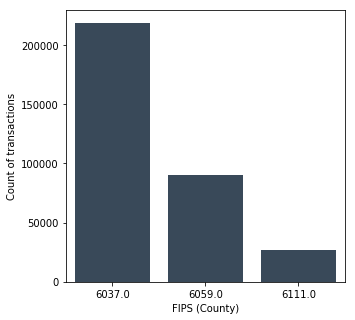

In [5]:
# check the counts of transactions in each county
# Reference: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
fips_dataset = data['fips'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(fips_dataset.index, fips_dataset.values,color='#34495e')
plt.xlabel('FIPS (County)')
plt.ylabel('Count of transactions')
plt.show()

##### Transactions in varible years

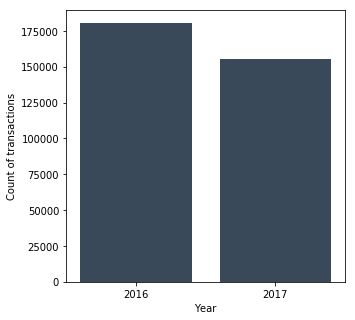

In [6]:
# check the counts of transactions in each year
# Reference: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
data['transaction_month'] = data['transactiondate'].dt.year
month_dataset = data['transaction_month'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(month_dataset.index, month_dataset.values,color='#34495e')
plt.xlabel('Year')
plt.ylabel('Count of transactions')
plt.show()

##### Choose a subset of data

We choose data of transtrations in Los Angeles (FIPS: 6037) to do the folowing work.

In [7]:
# drop column 'transaction_month' which was added above
data = data.drop(['transaction_month'], axis=1)

# choose data of '6037'
data_6037 = data[data['fips'] == 6037.0]
# drop column 'fips' and 'regionidcounty'
data_6037 = data_6037.drop(['fips', 'regionidcounty'], axis=1)
print(data_6037.shape)

(218460, 58)


##### Drop non feature and target columns

In [8]:
# drop column 'parcelid' and column 'transactiondate'
data_6037 = data_6037.drop(['parcelid', 'transactiondate'], axis=1)
print(data_6037.shape)

(218460, 56)


##### Drop features with >= 10% missing values

In [9]:
for column in data_6037.columns:
    if data_6037[column].isnull().sum()/data_6037[column].shape >= 0.1:
        data_6037 = data_6037.drop([column], axis=1)      
print(data_6037.shape)

(218460, 27)


##### Show types of features

In [10]:
# show column's type
# Reference: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
type_data_6037 = data_6037.dtypes
type_data_6037.columns = ["Count", "Column Type"]
type_data_6037

bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fullbathcnt                     float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidzip                     float64
roomcnt                         float64
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64


##### Drop two features with non float type

In [11]:
# drop column 'propertycountylandusecode' and column 'propertyzoningdesc'
data_6037= data_6037.drop(['propertycountylandusecode', 'propertyzoningdesc'], axis=1)
print(data_6037.shape)
data_6037.head()

(218460, 25)


,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,heatingorsystemtypeid,latitude,longitude,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
108,2.0,2.0,7.0,2.0,885.0,885.0,2.0,2.0,34199100.0,-118633000.0,...,0.0,1.0,1985.0,60143.0,248095.0,2015.0,187952.0,3049.98,6.037134e+13,-0.037763
109,2.0,2.0,6.0,2.0,885.0,885.0,2.0,2.0,34199100.0,-118633000.0,...,0.0,1.0,1985.0,61060.0,251878.0,2016.0,190818.0,3049.98,6.037134e+13,-0.037763
110,3.0,2.0,4.0,3.0,1242.0,1242.0,3.0,2.0,34196000.0,-118658000.0,...,0.0,1.0,1983.0,122100.0,395000.0,2015.0,272900.0,4990.31,6.037135e+13,-0.024208
111,3.0,2.0,8.0,3.0,1242.0,1242.0,3.0,2.0,34196000.0,-118658000.0,...,0.0,1.0,1983.0,185080.0,416252.0,2016.0,231172.0,4990.31,6.037135e+13,-0.024208
112,3.0,3.0,4.0,3.0,2445.0,2445.0,3.0,2.0,34184300.0,-118657000.0,...,0.0,1.0,1982.0,436551.0,581388.0,2015.0,144837.0,7170.22,6.037135e+13,0.038300


##### Standardize 24 features

In [12]:
for column in data_6037:
    if data_6037.columns.get_loc(column) == 24:
        break
    data_6037[column] = StandardScaler().fit_transform(data_6037[column].values.reshape(-1, 1))
print(data_6037.shape)
data_6037.head()

(218460, 25)


,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,heatingorsystemtypeid,latitude,longitude,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
108,-0.260985,-0.872478,0.506341,-0.274832,-0.904228,-0.887507,-0.274832,-0.62427,0.442336,-1.716129,...,-0.003026,-0.149415,0.866121,-0.522849,-0.327566,-1.000211,-0.187331,-0.374226,-0.005547,-0.037763
109,-0.260985,-0.872478,-0.026313,-0.274832,-0.904228,-0.887507,-0.274832,-0.62427,0.442336,-1.716129,...,-0.003026,-0.149415,0.866121,-0.518923,-0.321671,0.999789,-0.181275,-0.374226,-0.005547,-0.037763
110,0.691786,-0.872478,-1.091620,0.687224,-0.523124,-0.494474,0.687224,-0.62427,0.428069,-1.831541,...,-0.003026,-0.149415,0.785900,-0.257594,-0.098645,-1.000211,-0.007820,-0.126785,-0.005540,-0.024208
111,0.691786,-0.872478,1.038995,0.687224,-0.523124,-0.494474,0.687224,-0.62427,0.428069,-1.831541,...,-0.003026,-0.149415,0.785900,0.012040,-0.065528,0.999789,-0.095999,-0.126785,-0.005540,-0.024208
112,0.691786,-0.026785,-1.091620,0.687224,0.761100,0.829947,0.687224,-0.62427,0.374222,-1.826925,...,-0.003026,-0.149415,0.745789,1.088656,0.191802,-1.000211,-0.278441,0.151209,-0.005540,0.038300


##### Fill all nan with 0

In [13]:
data_6037 = data_6037.fillna(0)

##### Rank features

Split data_6037 to X and y：

In [14]:
# split data_6027 to X and y
X = data_6037.iloc[:,0:24]
y = data_6037['logerror']
print(X.shape, y.shape)

(218460, 24) (218460,)


The importance ranking is as below:

In [15]:
et = ensemble.ExtraTreesRegressor()
et.fit(X.values, y.values)
feature_importances = pd.DataFrame(et.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.style

,importance
lotsizesquarefeet,0.0872329
taxamount,0.085145
yearbuilt,0.0764289
calculatedfinishedsquarefeet,0.0715175
structuretaxvaluedollarcnt,0.0709051
latitude,0.0685489
longitude,0.0661421
landtaxvaluedollarcnt,0.064507
finishedsquarefeet12,0.0628053
taxvaluedollarcnt,0.056028


##### Drop feature 'roomcnt' with very low 'importance'

In [16]:
# drop feature 'assessmentyear' and 'roomcnt'
data_6037= data_6037.drop(['roomcnt'], axis=1)
print(data_6037.shape)

(218460, 24)


##### Feature correlation analysis

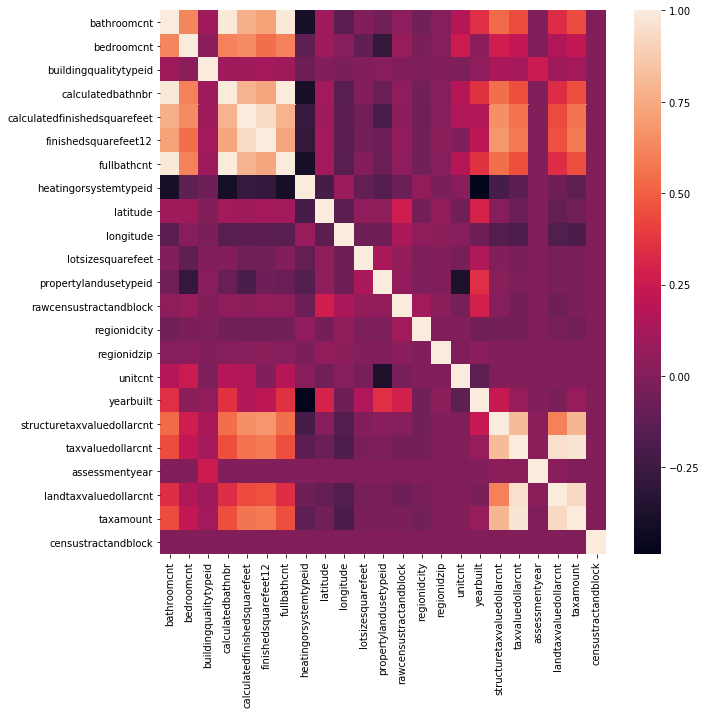

In [17]:
corr = data_6037.iloc[:,0:23].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr)

##### Drop one of the two features that have a correlation higher than 0.8

In [18]:
# Reference: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
corr_matrix = data_6037.corr()
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
data_6037 = data_6037[data_6037.columns[columns]]
print(data_6037.shape)

(218460, 18)


##### Drop properties with logerror outliers 

In [19]:
ulimit = np.percentile(data_6037.logerror.values, 99)
llimit = np.percentile(data_6037.logerror.values, 1)
data_6037 = data_6037[data_6037.logerror > llimit]
data_6037 = data_6037[data_6037.logerror < ulimit]
print(data_6037.shape)

(214080, 18)


There is nice normal distribution on the target 'logerror'

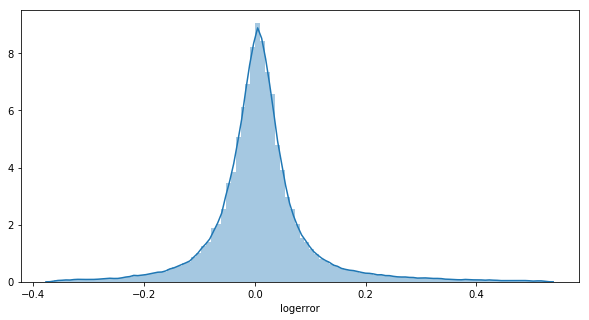

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(data_6037.logerror.values, bins=100)
plt.xlabel('logerror')
plt.show()

##### Describe data_6037

In [21]:
data_6037.describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,assessmentyear,censustractandblock,logerror
count,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000
mean,0.000435,-0.000562,-0.000314,-0.004406,-0.005392,0.001827,0.001806,-0.000008,0.009579,0.002439,0.001484,-0.000661,-0.005135,0.010388,-0.003315,0.000004,0.000065,0.009883
std,0.990167,0.991525,0.990571,0.977448,0.964964,1.001138,1.002103,0.976014,0.943511,1.000517,0.989723,0.969024,0.993905,0.994613,0.964231,1.000002,1.007981,0.091900
min,-2.166526,-2.563866,-2.689582,-1.846847,-0.624270,-3.514754,-2.984569,-0.261965,-38.482230,-1.393791,-0.554863,-0.091011,-0.149415,-5.591728,-0.779909,-1.000211,-0.005806,-0.363478
25%,-0.260985,-0.872478,-1.091620,-0.614931,-0.624270,-0.664336,-0.737434,-0.223166,-0.090150,-0.870913,-0.398618,-0.060794,-0.149415,-0.577870,-0.423339,-1.000211,-0.004766,-0.028400
50%,-0.260985,-0.026785,0.506341,-0.242367,-0.624270,-0.087137,-0.076740,-0.212073,-0.090150,-0.079961,-0.281208,-0.027751,-0.149415,-0.096539,-0.210791,0.999789,-0.003230,0.006000
75%,0.691786,0.818909,0.506341,0.307405,1.468909,0.388214,0.668208,-0.133497,0.744461,0.594307,0.179797,0.003117,-0.149415,0.785900,0.111139,0.999789,-0.001904,0.040200
max,16.888884,14.350010,3.169611,22.427449,6.911175,3.294237,2.811971,48.371860,1.245227,2.106587,6.302471,65.927551,216.528232,2.109558,65.532647,0.999789,329.776592,0.524994


##### Output data_6037

In [22]:
data_6037.to_csv('data_6037.csv')
print(data_6037.shape)
data_6037.head()

(214080, 18)


,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,assessmentyear,censustractandblock,logerror
108,-0.260985,-0.872478,0.506341,-0.904228,-0.62427,0.442336,-1.716129,0.434097,0.744461,-1.261122,-0.398618,-0.012752,-0.149415,0.866121,-0.522849,-1.000211,-0.005547,-0.037763
109,-0.260985,-0.872478,-0.026313,-0.904228,-0.62427,0.442336,-1.716129,0.434097,0.744461,-1.261122,-0.398618,-0.012752,-0.149415,0.866121,-0.518923,0.999789,-0.005547,-0.037763
110,0.691786,-0.872478,-1.091620,-0.523124,-0.62427,0.428069,-1.831541,1.537401,0.744461,-1.258010,0.000000,-0.012752,-0.149415,0.785900,-0.257594,-1.000211,-0.005540,-0.024208
111,0.691786,-0.872478,1.038995,-0.523124,-0.62427,0.428069,-1.831541,1.537401,0.744461,-1.258010,0.000000,-0.012752,-0.149415,0.785900,0.012040,0.999789,-0.005540,-0.024208
112,0.691786,-0.026785,-1.091620,0.761100,-0.62427,0.374222,-1.826925,0.180657,0.744461,-1.258010,-0.398618,-0.002535,-0.149415,0.745789,1.088656,-1.000211,-0.005540,0.038300
